In [106]:
import numpy as np
import stream as strm
import matplotlib.pyplot as plt
from filters import HPF1, LPF1
import IPython.display as ipd

In [107]:
# stream length, in seconds
length = 3.

In [108]:
# sample frequency, in Hz (usually always 44100)
sampfreq = 44100

In [109]:
# frequency of note to generate in Hz
nfreq = 220

In [110]:
# initialise stream
stream = strm.Stream(length, sampfreq)

In [111]:
# generate simple square wave & listen
stream.values = np.where((stream.samples * 0.5 * nfreq / sampfreq) % 2 > 1, -1., 1.)
ipd.Audio(stream.values, rate=sampfreq, autoplay=True)

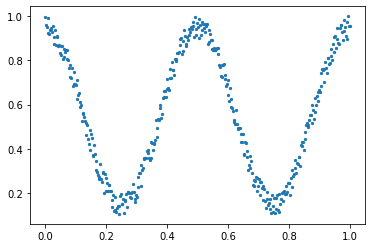

In [118]:
# create filter sweep mapping function
sfunc = lambda x: 0.5+np.cos(x*4*np.pi)*0.4+np.random.random(len(x))*0.1
plt.scatter(np.linspace(0,1,400), sfunc(np.linspace(0,1,400)), s=5)

In [119]:
# apply filter sweep & listen
stream.bufferize(0.02)
stream.filt_sweep(LPF1, sfunc)
ipd.Audio(stream.values, rate=sampfreq, autoplay=True)